In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[ 5.16658396,  7.84425507],
       [ 1.94948726, -0.72581544],
       [ 2.64653426, -0.95297321],
       ...,
       [ 7.00482463,  7.85648269],
       [ 3.75571295, -0.37722114],
       [ 5.02981309,  7.41065427]], shape=(1000, 2))

In [4]:
y

array([1, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2,
       1, 1, 0, 2, 1, 1, 0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 1, 0, 0, 2, 2, 1,
       1, 2, 2, 0, 1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 2, 0, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 2, 1, 2, 0, 2, 0,
       1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 2, 1, 1, 0,
       0, 2, 1, 0, 2, 2, 2, 1, 2, 2, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 1,
       1, 1, 1, 0, 1, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 0, 2, 1,
       2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 2,
       2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 0, 2, 1, 1, 2, 2, 0, 0, 1, 1, 0, 2,
       0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 2, 2, 2,
       0, 2, 1, 2, 0, 1, 2, 1, 0, 1, 0, 0, 1, 0, 1, 2, 2, 0, 0, 2, 2, 0,
       2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 1, 0, 2, 0, 1,

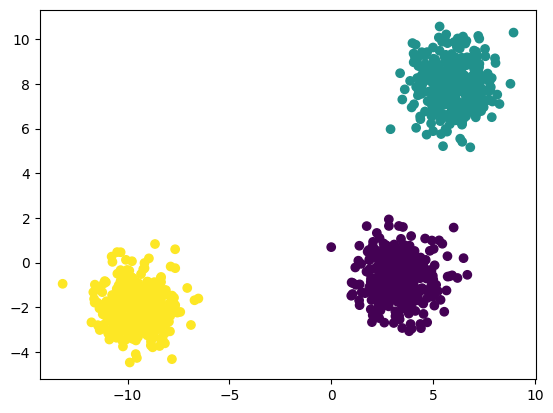

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [9]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans

In [11]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[1339.999999999999,
 484.4370209109303,
 47.27608289569805,
 39.46128786263555,
 33.187249624058246,
 26.539007356681438,
 29.649445571408197,
 21.614105302768728,
 21.00378204468114,
 18.043760957627782]

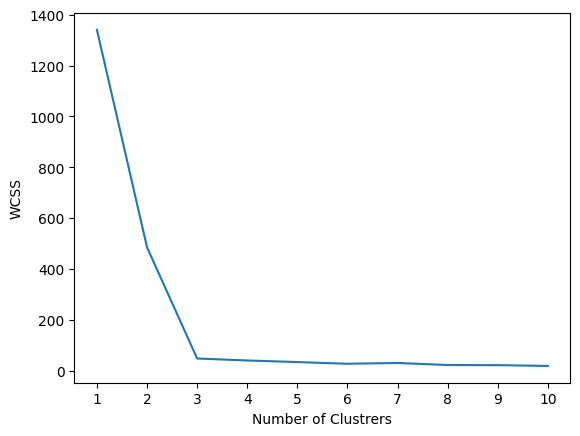

In [13]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [14]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [15]:
kmeans.fit_predict(X_train_scaled)

array([2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 1, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 0, 0, 1, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1,
       0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1,
       0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2, 0, 1, 1, 1, 1, 0,
       2, 1, 0, 2, 2, 0, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 0, 1, 0, 2,
       1, 1, 1, 1, 0, 1, 2, 0, 2, 1, 2, 0, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0,
       2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 2, 0, 2, 1, 2, 2, 2, 1, 0, 0,
       2, 0, 2, 1, 2, 1, 2, 0, 1, 0, 0, 1, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2,
       2, 1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 2, 2, 1,
       0, 1, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 2, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2,
       1, 1, 2, 1, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1,

In [16]:
y_pred=kmeans.predict(X_test_scaled)

In [17]:
y_pred

array([0, 0, 1, 0, 2, 0, 0, 2, 0, 1, 2, 1, 2, 0, 1, 0, 1, 2, 2, 1, 2, 1,
       2, 0, 0, 0, 1, 1, 2, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 1, 2, 0, 0, 0,
       2, 2, 2, 0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 0, 0, 2, 0, 2, 1, 1, 2, 1,
       2, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2,
       2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 2, 0, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 1, 2, 0, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1,
       1, 1, 0, 2, 2, 1, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 0, 2,
       0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2,
       0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1,
       1, 0, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2, 0,
       0, 2, 1, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 1,
       2, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 2,

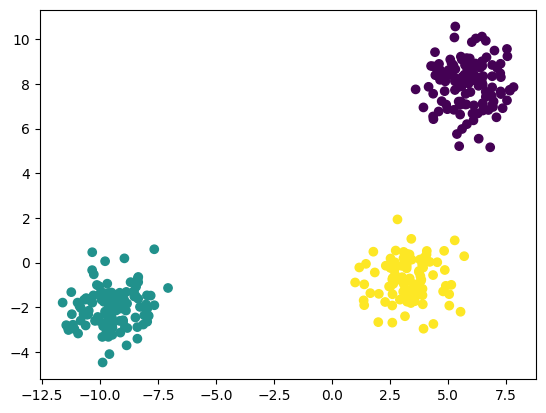

In [18]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [19]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [20]:
## kneelocator
!pip install kneed

In [21]:
from kneed import KneeLocator

In [22]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [23]:
kl.elbow

np.int64(3)

In [24]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [25]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [26]:
silhouette_coefficients

[np.float64(0.6325267602279501),
 np.float64(0.8248074148634575),
 np.float64(0.6714738067340875),
 np.float64(0.5331398434106599),
 np.float64(0.5160486077045723),
 np.float64(0.3675341353040883),
 np.float64(0.3511652621303741),
 np.float64(0.3404470324254266),
 np.float64(0.35191987239765266)]

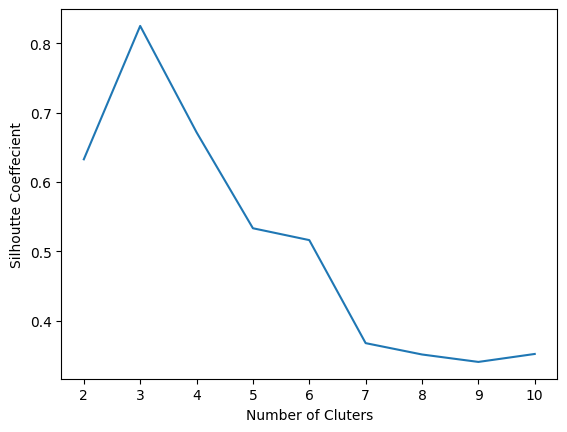

In [27]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()